# Data plotting by using matplotlib Library


In [1]:
%matplotlib inline
import sys
import matplotlib
matplotlib.use('Agg')

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/opt/irisapp/misc/data.csv')

df.plot()

plt.show()


In [2]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Calories')
plt.show()


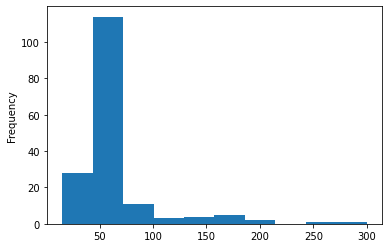

In [14]:
df["Duration"].plot(kind = 'hist')
plt.show()